## Importing required libraries 

In [1]:
# importing the required libraries

# for data analysis 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats 
from scipy.stats import pearsonr

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


# for clustering 

# K-Means
from sklearn.cluster import KMeans 

from sklearn.cluster import DBSCAN
from itertools import product

from sklearn.cluster import AffinityPropagation


## Reading the dataset 

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.index = df['CustomerID']
del df['CustomerID']

In [3]:
# all the columns of the dataset

df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [4]:
# size of the dataset

df.shape

(200, 4)

In [5]:
# preview of the dataset

df[:5]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
# summary of dataset 

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
# checking for null values in the dataset

df.isnull().sum()

## results shows that there are no null values in the columns

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# One-hot encodding on the Gender column because used algorithm does not work with categorical dataset


## Exploratory Data Analysis

In [12]:
# taking the age values for all males
mAge = df[df['Gender'] == 'Male']['Age']

# taking the age value for all females
fAge = df[df['Gender'] == "Female"]['Age']

# taking the annual salary of male customers 
mSalary = df[df["Gender"]=="Male"]['Annual Income (k$)']

# taking the annual salary of female customers 
fSalary = df[df["Gender"]=="Female"]['Annual Income (k$)']

# taking the spending score of male customers 
mSpending = df[df["Gender"]=="Male"]['Spending Score (1-100)']

# taking the spending scores of female customers 
fSpending = df[df["Gender"]=="Female"]['Spending Score (1-100)']

# dividing the age data into different bins 
age_bins = range(15,75,5)

# spending score bins 
spending_bins = range(0,100,5)

# Annual income bins
income_bins = range(10, 150, 10)


### Distribution of spending score on the basis of age

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


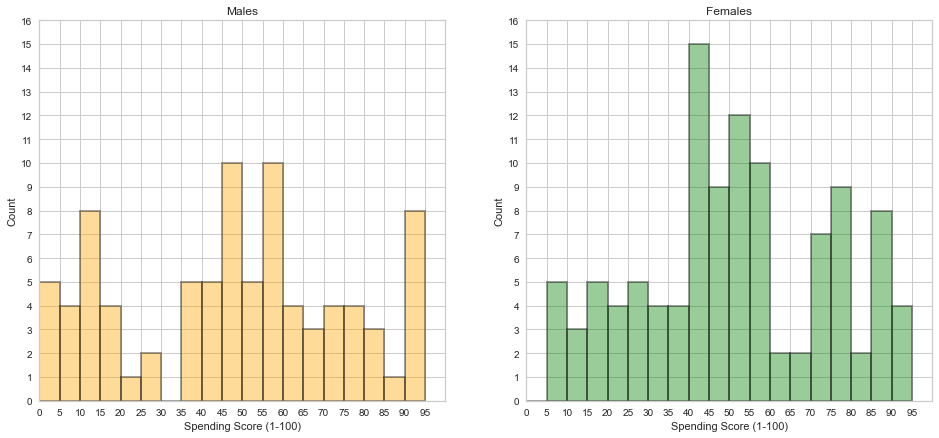

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
sns.distplot(mSpending, bins=spending_bins, kde=False, color='Orange', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')


sns.distplot(fSpending, bins=spending_bins, kde=False, color='Green', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')

plt.show()

### Distribution of customer on the basis of Annual income 

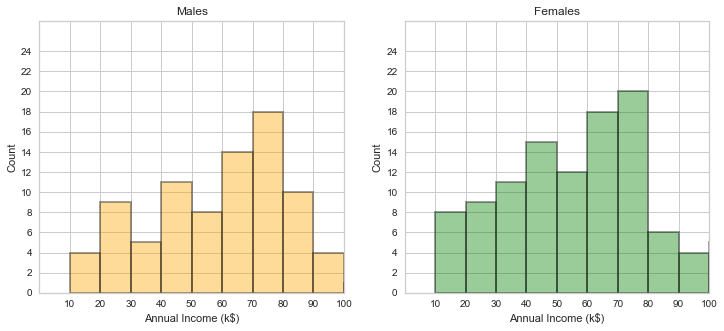

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(mSalary, bins=income_bins, kde=False, color='Orange', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(income_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,25,2))
ax1.set_ylim(0,27)
ax1.set_title('Males')
ax1.set_ylabel('Count')


sns.distplot(fSalary, bins=income_bins, kde=False, color='Green', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(income_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,25,2))
ax2.set_ylim(0,27)
ax2.set_title('Females')
ax2.set_ylabel('Count')

plt.show()

#### Finding which age group visits the mall often

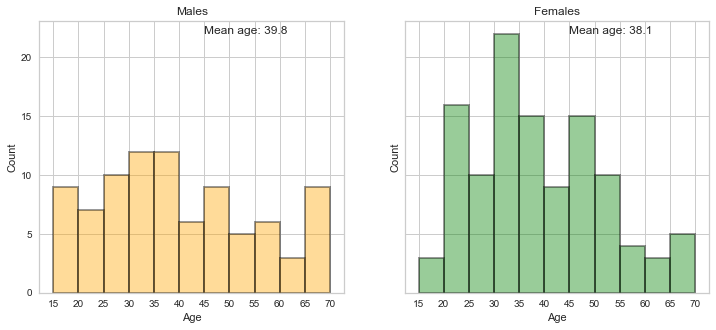

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)
sns.distplot(mAge, bins=age_bins, kde=False, color="Orange", ax = ax1, hist_kws=dict(edgecolor="black", linewidth=2))
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45,22, "Mean age: {:.1f}".format(mAge.mean()))
ax1.set_xticks(age_bins)


sns.distplot(fAge, bins=age_bins, kde=False, color="Green", ax = ax2, hist_kws=dict(edgecolor="black", linewidth=2))
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45,22, "Mean age: {:.1f}".format(fAge.mean()))
ax2.set_xticks(age_bins)

plt.show()

### K-Means

In [17]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


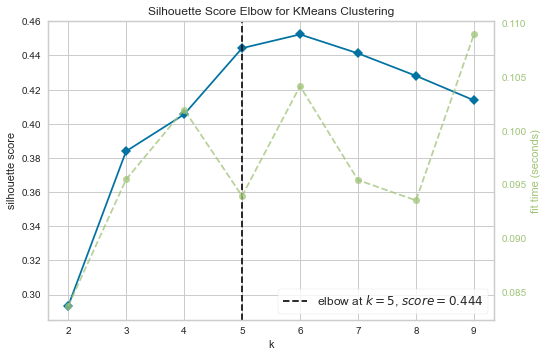

In [18]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [19]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


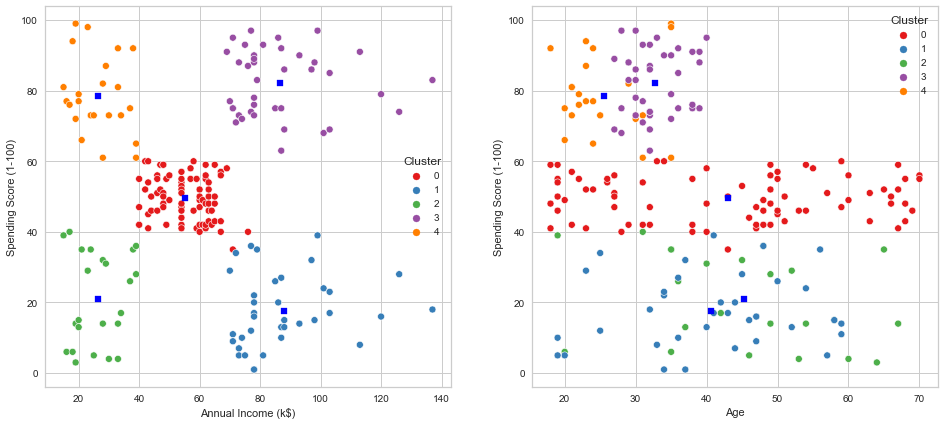

In [45]:
fig1, (axes) = plt.subplots(1,2,figsize=(16,7))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [21]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes


,KM_size
Cluster,
0,79
1,36
2,23
3,39
4,23


## DBSCAN

In [22]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [23]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

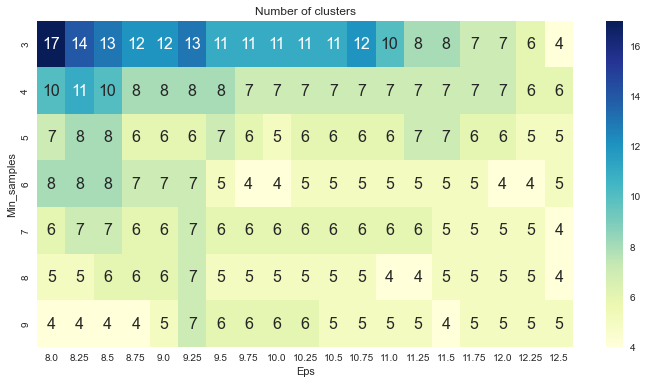

In [24]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

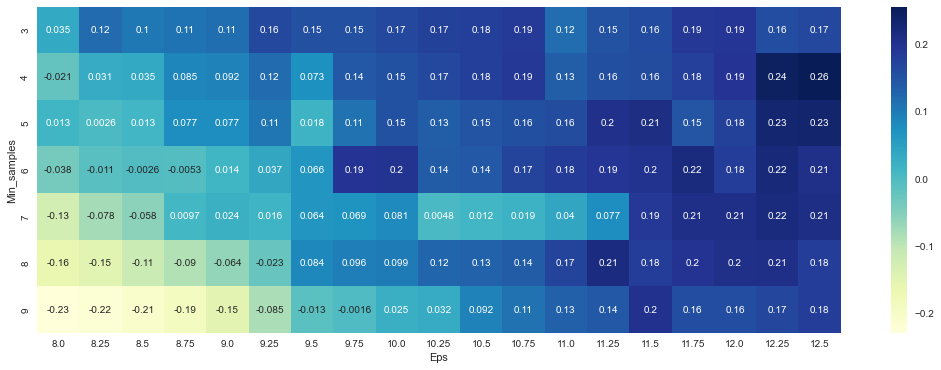

In [25]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [26]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [27]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


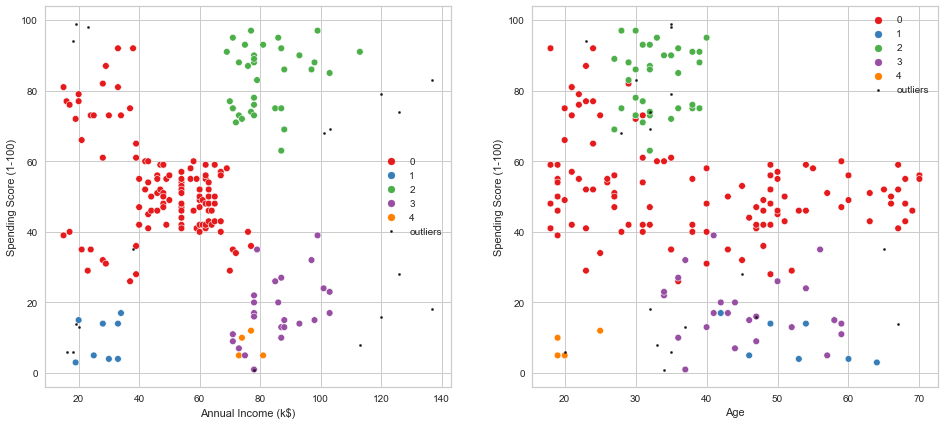

In [46]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(16,7))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

## ________________________________________________

## Affinity Propagation

In [29]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [30]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [31]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


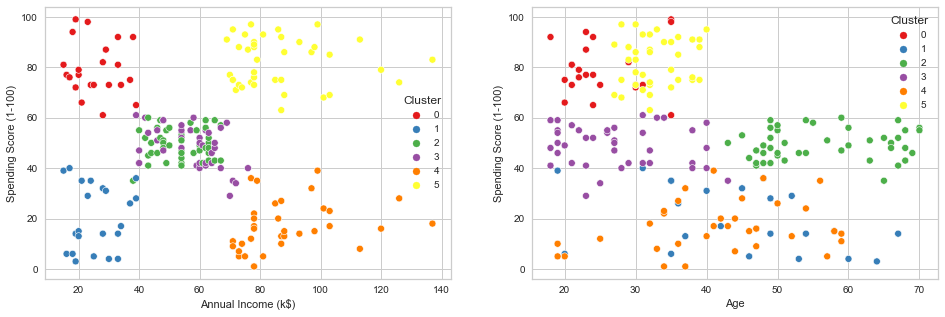

In [32]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(16,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

## Comparing results

In [33]:
clusters = pd.concat([KM_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
-1,NaN,18.0,NaN
0,79.0,112.0,22.0
1,36.0,8.0,22.0
2,23.0,34.0,44.0
3,39.0,24.0,39.0
4,23.0,4.0,34.0
5,NaN,NaN,39.0
